In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
import numpy as np
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
%matplotlib inline

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
TempCBE = pd.read_csv('TempCBE.csv', parse_dates=['YYYYMM'], index_col='YYYYMM',date_parser=dateparse)
TempCBE.head()
TempCBE = TempCBE.drop(['Unnamed: 0'], axis = 1)
#RainCBE.columns = ['YYYYMM','Rainfall']
TempCBE.index

DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01',
               ...
               '2002-03-01', '2002-04-01', '2002-05-01', '2002-06-01',
               '2002-07-01', '2002-08-01', '2002-09-01', '2002-10-01',
               '2002-11-01', '2002-12-01'],
              dtype='datetime64[ns]', name='YYYYMM', length=1224, freq=None)

In [3]:
ts = TempCBE['Temp']
ts.head(10)

YYYYMM
1901-01-01    25.787
1901-02-01    26.645
1901-03-01    27.172
1901-04-01    28.646
1901-05-01    27.652
1901-06-01    26.195
1901-07-01    25.794
1901-08-01    25.953
1901-09-01    26.309
1901-10-01    26.104
Name: Temp, dtype: float64

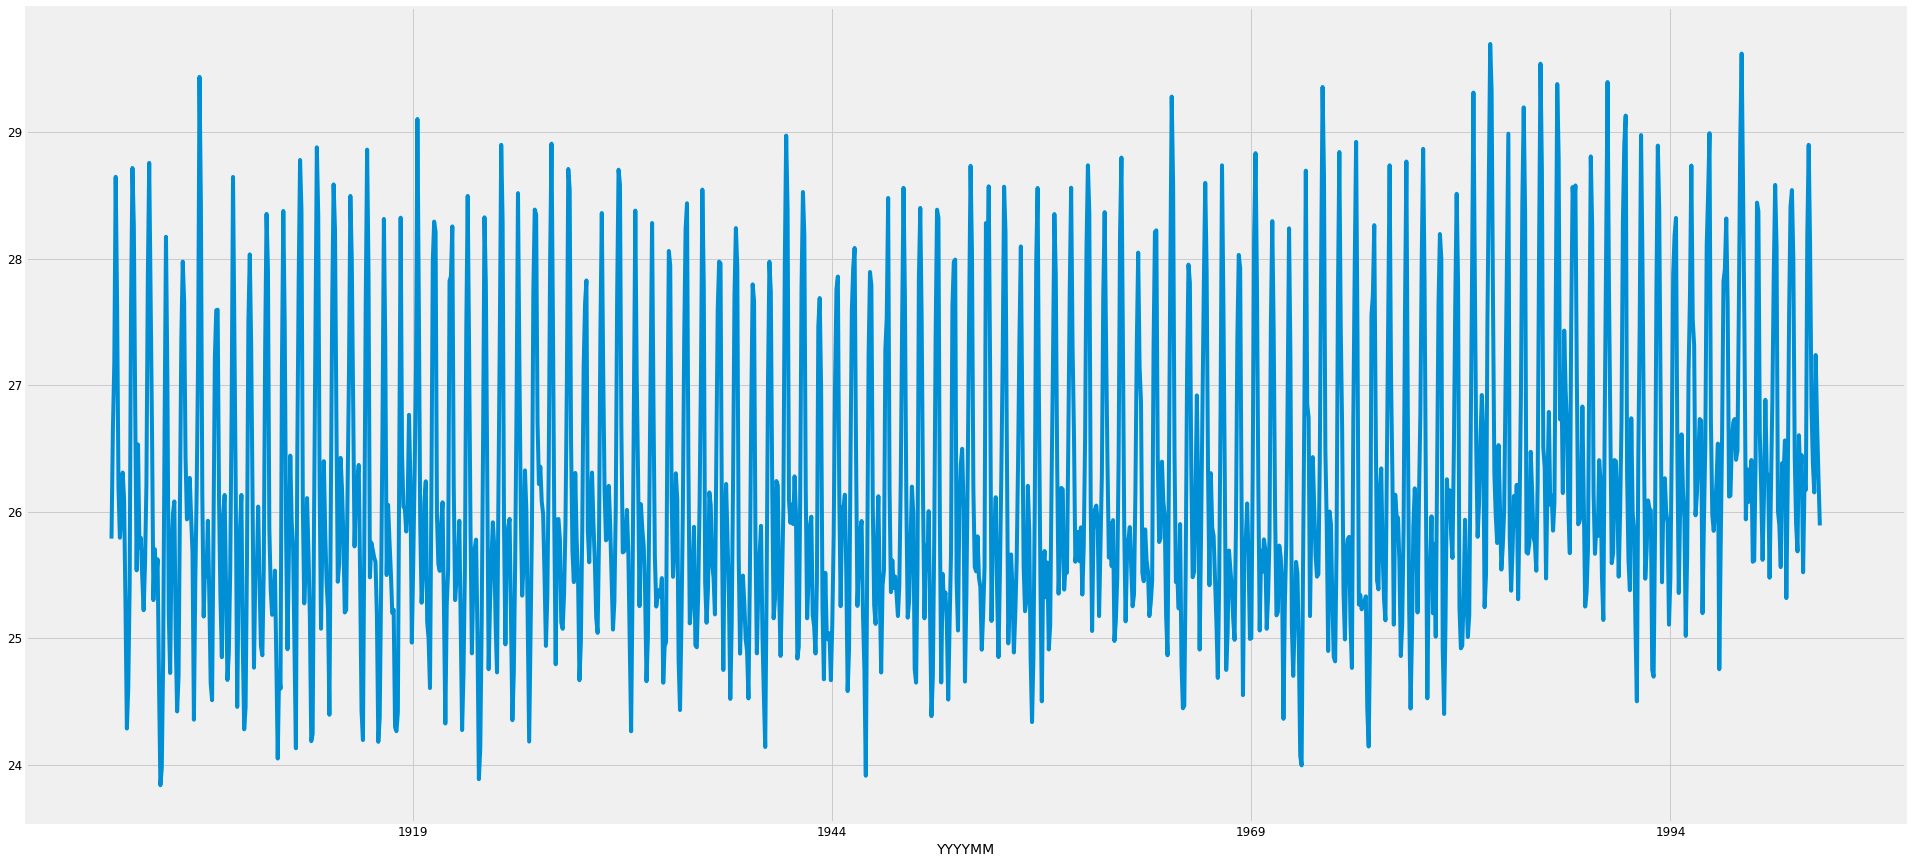

In [4]:
ts.plot(figsize=(30, 15))
plt.show()

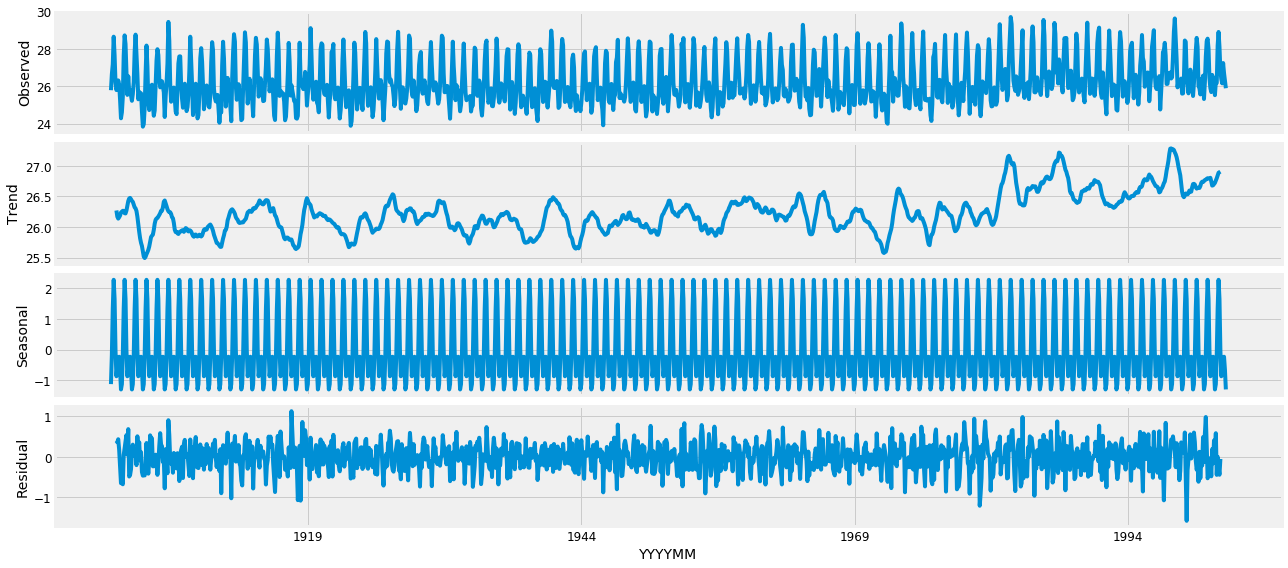

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.show()

In [6]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [7]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:11466.606067236742
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:9757.563657081062
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2178.4248992314565
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1487.501356762673
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2185.1585069632356
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1496.9651356269876
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1829.7151130497875
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1489.4977761085324
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:9808.442298454906
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:8208.171995288445
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2024.8604265541203
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1310.6533149231095
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2035.030954897593
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1318.7593652549772
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1666.9558012599246
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1322.5159975693168
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3398.4380844623497
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2837.45633575906

C:\Users\HP PC\Anaconda2\envs\Analytics\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1179.1850681453366
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:1533.6635414494253
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1159.5881279588916
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:3252.584840050771
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2827.8796143320483


C:\Users\HP PC\Anaconda2\envs\Analytics\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:2145.2623467486865
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1367.8726514113869
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:2068.619351005994
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1393.4685451413566
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1754.4429300695642
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1369.873314048907
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:3200.106199053867
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2817.5313574597676
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:2008.6653505198315
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1204.2151657562144
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1862.5258628914444


C:\Users\HP PC\Anaconda2\envs\Analytics\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1221.2497788283886
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:1607.710237943645
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1218.4311932007463


In [8]:
#ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1157.587821088459

In [9]:
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8271      0.027     31.024      0.000       0.775       0.879
ma.L1         -0.4997      0.043    -11.568      0.000      -0.584      -0.415
ma.S.L12      -0.9170      0.013    -71.871      0.000      -0.942      -0.892
sigma2         0.1510      0.006     26.774      0.000       0.140       0.162


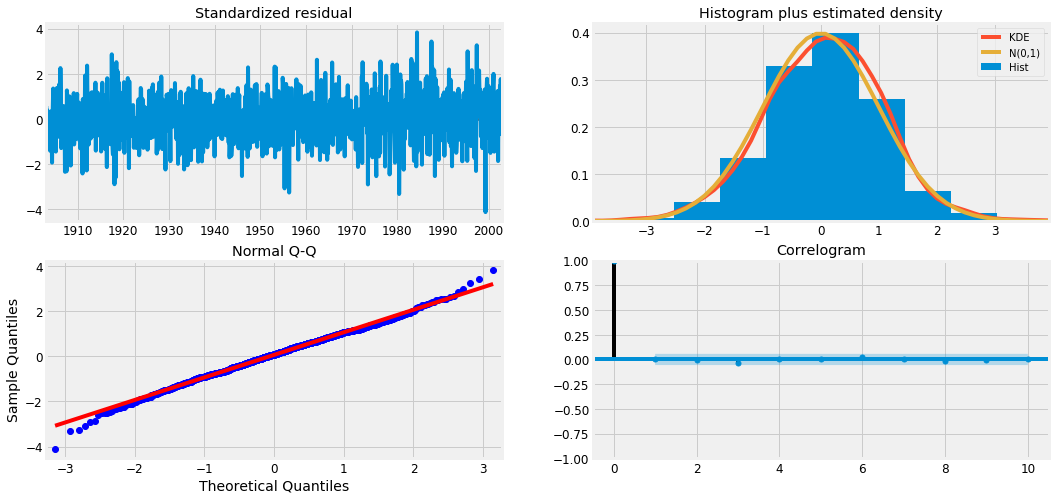

In [10]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

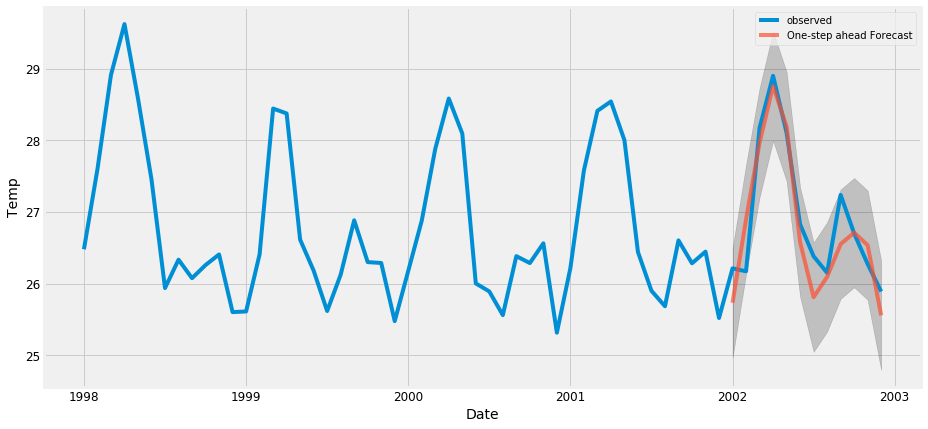

In [11]:
pred = results.get_prediction(start=pd.to_datetime('2002-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts['1998':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Temp')
plt.legend()
plt.show()

In [12]:
y_forecasted = pred.predicted_mean
y_truth = ts['2002-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.16


In [13]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.39


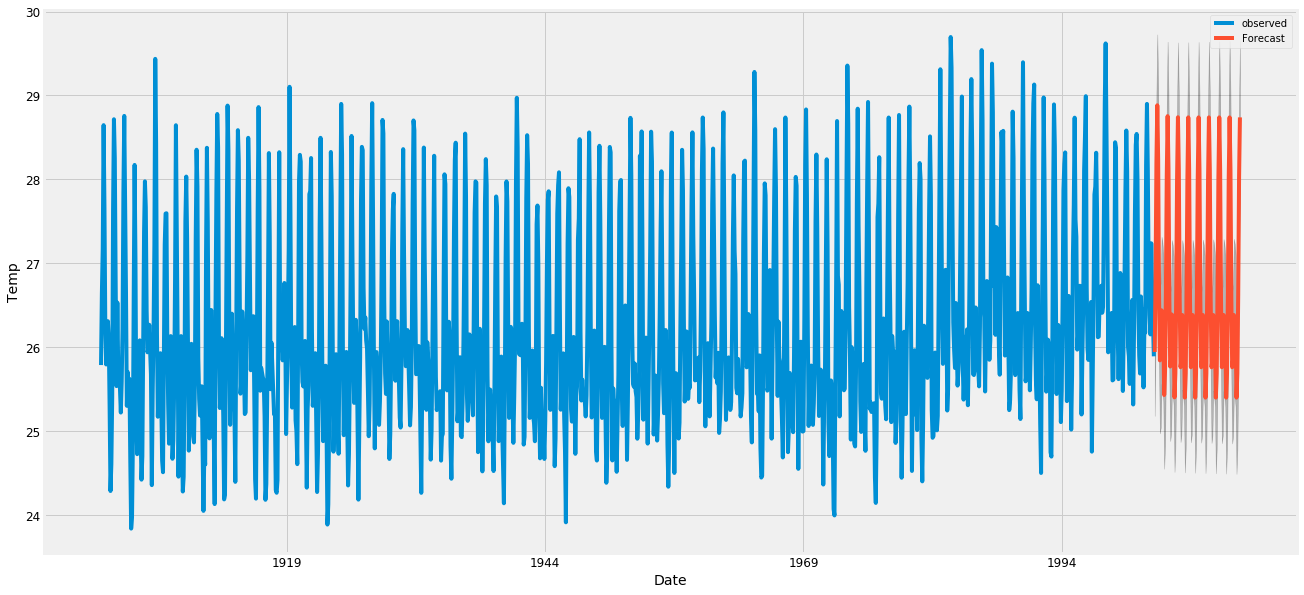

In [14]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = ts.plot(label='observed', figsize=(20, 10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Temp')
plt.legend()
plt.show()

In [15]:
yhat = results.forecast(100)

In [16]:
yhat

2003-01-01    25.942720
2003-02-01    26.832170
2003-03-01    28.196529
2003-04-01    28.882543
2003-05-01    28.237349
2003-06-01    26.670314
2003-07-01    25.842625
2003-08-01    25.914249
2003-09-01    26.438716
2003-10-01    26.364366
2003-11-01    26.231508
2003-12-01    25.430333
2004-01-01    25.714192
2004-02-01    26.643163
2004-03-01    28.040210
2004-04-01    28.753258
2004-05-01    28.130423
2004-06-01    26.581880
2004-07-01    25.769485
2004-08-01    25.853758
2004-09-01    26.388686
2004-10-01    26.322988
2004-11-01    26.197287
2004-12-01    25.402030
2005-01-01    25.690783
2005-02-01    26.623803
2005-03-01    28.024198
2005-04-01    28.740015
2005-05-01    28.119471
2005-06-01    26.572822
                ...    
2008-11-01    26.193382
2008-12-01    25.398800
2009-01-01    25.688112
2009-02-01    26.621594
2009-03-01    28.022371
2009-04-01    28.738504
2009-05-01    28.118221
2009-06-01    26.571788
2009-07-01    25.761138
2009-08-01    25.846855
2009-09-01    26

In [17]:
results.predict()

1901-01-01     0.000000
1901-02-01    10.663668
1901-03-01    16.393308
1901-04-01    18.745906
1901-05-01    20.277484
1901-06-01    20.327198
1901-07-01    19.641736
1901-08-01    19.212021
1901-09-01    19.140554
1901-10-01    19.287610
1901-11-01    19.239440
1901-12-01    18.827356
1902-01-01    43.990957
1902-02-01    25.669072
1902-03-01    26.149757
1902-04-01    28.435886
1902-05-01    27.576569
1902-06-01    26.358002
1902-07-01    26.068552
1902-08-01    26.005550
1902-09-01    26.524511
1902-10-01    26.017563
1902-11-01    25.139001
1902-12-01    24.281301
1903-01-01    24.910718
1903-02-01    26.240510
1903-03-01    27.572133
1903-04-01    28.912361
1903-05-01    28.092771
1903-06-01    26.478673
                ...    
2000-07-01    25.460482
2000-08-01    25.824762
2000-09-01    26.157439
2000-10-01    26.264969
2000-11-01    26.118760
2000-12-01    25.480412
2001-01-01    25.622501
2001-02-01    26.802577
2001-03-01    28.411098
2001-04-01    29.102837
2001-05-01    28

In [18]:
date = input("Enter a date to get predicted temperature (YYYY-MM-01) - ")
forecast = results.forecast(pd.to_datetime(date))
forecast[len(forecast)-1]

Enter a date to get predicted temperature (YYYY-MM-01) - 2018-11-01


26.193381476956144